# Copernicus Atmosphere using ECMWFSearch plugin

In this tutorial we will show you how to use eodag to download data from providers using [ECMWFSearch](../../plugins_reference/generated/eodag.plugins.search.build_search_result.ECMWFSearch.rst) `eodag` plugin. You can currently find three providers that uses it, `cop_ads`, `cop_cds` and `cop_ewds`. For this tutorial we will use `cop_ads`, but `cop_cds` and `cop_ewds` are used the same way.

In [1]:
from eodag import EODataAccessGateway, setup_logging

setup_logging(1)  # 0: nothing, 1: only progress bars, 2: INFO, 3: DEBUG
dag = EODataAccessGateway()
dag.set_preferred_provider("cop_ads")

## Search (build download request)

There are two use cases, a search for a product already configured in EODAG, or a search for a dataset not already configured, where you will have a little more to do.

We can add a `variable` (Temperature, `temperature`) and one `model_level` to the request because `CAMS_EAC4` is configured to request for some pre-configured values. Check the dataset available values to make your selection.

> Note: specifying your own variables will completely overwrite default values configured for `CAMS_EAC4` product type.

### Check available queryables and default values:

Available queryables parameters and associated values can be checked using [list_queryables()](../api_user_guide/4_queryables.ipynb) method, or through [cop_ads](https://ads-beta.atmosphere.copernicus.eu/datasets/cams-global-reanalysis-eac4?tab=download) or [cop_cds](https://cds-beta.climate.copernicus.eu/datasets) websites:

In [2]:
queryables = dag.list_queryables(provider="cop_ads", productType="CAMS_EAC4")
queryables

{'ecmwf:variable': typing.Annotated[typing.List[typing.Literal['10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature', '2m_temperature', 'black_carbon_aerosol_optical_depth_550nm', 'dust_aerosol_optical_depth_550nm', 'high_cloud_cover', 'high_vegetation_cover', 'lake_cover', 'land_sea_mask', 'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation', 'low_cloud_cover', 'low_vegetation_cover', 'mean_altitude_of_maximum_injection', 'mean_sea_level_pressure', 'medium_cloud_cover', 'near_ir_albedo_for_diffuse_radiation', 'near_ir_albedo_for_direct_radiation', 'organic_matter_aerosol_optical_depth_550nm', 'particulate_matter_10um', 'particulate_matter_1um', 'particulate_matter_2.5um', 'sea_ice_cover', 'sea_salt_aerosol_optical_depth_550nm', 'sea_surface_temperature', 'skin_reservoir_content', 'skin_temperature', 'snow_albedo', 'snow_depth', 'soil_clay_content', 'soil_type', 'sulphate_aerosol_optical_depth_550nm', 'surface_geopotential', 'surface_pressure', 'surface_roughness', 'total_aerosol_optical_depth_1240nm', 'total_aerosol_optical_depth_469nm', 'total_aerosol_optical_depth_550nm', 'total_aerosol_optical_depth_670nm', 'total_aerosol_optical_depth_865nm', 'total_cloud_cover', 'total_column_acetone', 'total_column_aldehydes', 'total_column_carbon_monoxide', 'total_column_ethane', 'total_column_ethanol', 'total_column_ethene', 'total_column_formaldehyde', 'total_column_formic_acid', 'total_column_hydrogen_peroxide', 'total_column_hydroxyl_radical', 'total_column_isoprene', 'total_column_methane', 'total_column_methanol', 'total_column_methyl_peroxide', 'total_column_nitric_acid', 'total_column_nitrogen_dioxide', 'total_column_nitrogen_monoxide', 'total_column_olefins', 'total_column_organic_nitrates', 'total_column_ozone', 'total_column_paraffins', 'total_column_peroxyacetyl_nitrate', 'total_column_propane', 'total_column_sulphur_dioxide', 'total_column_water', 'total_column_water_vapour', 'type_of_high_vegetation', 'type_of_low_vegetation', 'uv_visible_albedo_for_diffuse_radiation', 'uv_visible_albedo_for_direct_radiation', 'vertically_integrated_mass_of_dust_aerosol_0.03-0.55um', 'vertically_integrated_mass_of_dust_aerosol_0.55-9um', 'vertically_integrated_mass_of_dust_aerosol_9-20um', 'vertically_integrated_mass_of_hydrophilic_black_carbon_aerosol', 'vertically_integrated_mass_of_hydrophilic_organic_matter_aerosol', 'vertically_integrated_mass_of_hydrophobic_black_carbon_aerosol', 'vertically_integrated_mass_of_hydrophobic_organic_matter_aerosol', 'vertically_integrated_mass_of_sea_salt_aerosol_0.03-0.5um', 'vertically_integrated_mass_of_sea_salt_aerosol_0.5-5um', 'vertically_integrated_mass_of_sea_salt_aerosol_5-20um', 'vertically_integrated_mass_of_sulphate_aerosol']], FieldInfo(annotation=NoneType, required=False, default='2m_dewpoint_temperature', title='Variable', description='Please, consult the product user guide in the documentation section for more information on these variables.')], 'ecmwf:pressure_level': typing.Annotated[list, FieldInfo(annotation=NoneType, required=False, default=None, title='Pressure level')], 'ecmwf:model_level': typing.Annotated[list, FieldInfo(annotation=NoneType, required=False, default=None, title='Model level', description="Model level 1 is the top of the atmosphere. Model level 60 is the Earth's surface.")], 'ecmwf:time': typing.Annotated[typing.List[typing.Literal['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00']], FieldInfo(annotation=NoneType, required=False, default='00:00', title='Time', description='Model base time as HH:MM (UTC)')], 'ecmwf:data_format': typing.Annotated[typing.Literal['grib', 'netcdf_zip'], FieldInfo(annotation=NoneType, required=False, default='grib', title='Data format', description='Please select a format for the data files, the native format of MARS dataset is GRIB.')], 'start': typing.Annotated[typing.Union[datetime.datetime, datetime.date], FieldInfo(annotation=NoneType, required=False, default='2003-01-0

In [3]:
queryables['ecmwf:variable']

typing.Annotated[typing.List[typing.Literal['10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature', '2m_temperature', 'black_carbon_aerosol_optical_depth_550nm', 'dust_aerosol_optical_depth_550nm', 'high_cloud_cover', 'high_vegetation_cover', 'lake_cover', 'land_sea_mask', 'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation', 'low_cloud_cover', 'low_vegetation_cover', 'mean_altitude_of_maximum_injection', 'mean_sea_level_pressure', 'medium_cloud_cover', 'near_ir_albedo_for_diffuse_radiation', 'near_ir_albedo_for_direct_radiation', 'organic_matter_aerosol_optical_depth_550nm', 'particulate_matter_10um', 'particulate_matter_1um', 'particulate_matter_2.5um', 'sea_ice_cover', 'sea_salt_aerosol_optical_depth_550nm', 'sea_surface_temperature', 'skin_reservoir_content', 'skin_temperature', 'snow_albedo', 'snow_depth', 'soil_clay_content', 'soil_type', 'sulphate_aerosol_optical_depth_550nm', 'surface_geopotential', 'surface_pressure', 'surface_roughness'

Here we can see the list of available values for `variable`, and that the default value configured for `CAMS_EAC4` is `2m_dewpoint_temperature`

### Search from an existing product type:

In [4]:
# Request for all parameters
products_from_product_type = dag.search(
    start="2021-01-01",
    end="2021-01-02",
    productType="CAMS_EAC4",
    count=True
)
print(
    "%s product built %s,\n having variable = %s\n"
    % (
        products_from_product_type.number_matched,
        products_from_product_type[0],
        products_from_product_type[0].properties.get("ecmwf:variable"),
    )
)
# Request for temperature on one model level
products_from_product_type = dag.search(
    start="2021-01-01",
    end="2021-01-02",
    productType="CAMS_EAC4",
    count=True,
    **{"ecmwf:variable": "temperature",
       "ecmwf:model_level": "1"},

)
print(
    "%s product built %s,\n having variable = %s\n"
    % (
        products_from_product_type.number_matched,
        products_from_product_type[0],
        products_from_product_type[0].properties.get("ecmwf:variable"),
    )
)

1 product built EOProduct(id=CAMS_EAC4_20210101_20210102_6b7cb619839dcb7699d24d04cef67121d47f8348, provider=cop_ads),
 having variable = 2m_dewpoint_temperature

1 product built EOProduct(id=CAMS_EAC4_20210101_20210102_4a4a8a1a556e215789bbedbe797bed4292fece99, provider=cop_ads),
 having variable = temperature



### Search using a custom request:

Here we will use a set of custom parameters corresponding to `CAMS_EAC4`, which should result to the same request sent to ads.

In [5]:
ads_req_params = {
    "ecmwf:dataset": "cams-global-reanalysis-eac4",
    "ecmwf:variable": "temperature",
    "ecmwf:model_level": "1",
    "ecmwf:time": "00:00",
    "ecmwf:data_format": "grib",
}

products_from_ads_req = dag.search(
    provider="cop_ads",
    start="2021-01-01",
    end="2021-01-02",
    **ads_req_params,
)

# orderLink property must be the same with the two request methods,
# as they are built from the same ADS request arguments
if (
    products_from_ads_req[0].properties["orderLink"]
    == products_from_product_type[0].properties["orderLink"]
):
    print(
        "Request using productType or directly ADS parameters result to the\n",
        "same orderLink %s"
        % (
            products_from_ads_req[0].properties["orderLink"],
        )
    )

Request using productType or directly ADS parameters result to the
 same orderLink https://ads.atmosphere.copernicus.eu/api/retrieve/v1/processes/cams-global-reanalysis-eac4/execution?{"inputs": {"data_format": "grib", "date": ["2021-01-01/2021-01-02"], "model_level": "1", "time": "00:00", "variable": "temperature"}}


### Send product retrieval request, download when available and return an `xarray.DataArray`

- download performed using ADS credentials set in `~/.config/eodag/eodag.yml` as for other EO providers:
```yaml
    cop_ads:
        priority:
        download:
            output_dir: /my/path/to/data/eodag_data
        auth:
            credentials:
                apikey: myapikey
```
- you can check your request status from https://ads.atmosphere.copernicus.eu/requests?tab=all
- See [support](https://ads.atmosphere.copernicus.eu/help) for any problem related to the provider

In [6]:
# Get XarrayDict
xd = products_from_ads_req[0].to_xarray()
xd

0.00B [00:00, ?B/s]

{'CAMS-GLOBAL-REANALYSIS-EAC4_20210101_20210102_4a4a8a1a556e215789bbedbe797bed4292fece99.grib': <xarray.Dataset> Size: 931kB
Dimensions:     (time: 2, latitude: 241, longitude: 480)
Coordinates:
  * time        (time) datetime64[ns] 16B 2021-01-01 2021-01-02
    step        timedelta64[ns] 8B ...
    hybrid      float64 8B ...
  * latitude    (latitude) float64 2kB 90.0 89.25 88.5 ... -88.5 -89.25 -90.0
  * longitude   (longitude) float64 4kB 0.0 0.75 1.5 2.25 ... 357.8 358.5 359.2
    valid_time  (time) datetime64[ns] 16B ...
Data variables:
    t           (time, latitude, longitude) float32 925kB ...
Attributes: (12/31)
    GRIB_edition:                     2
    GRIB_centre:                      ecmf
    GRIB_centreDescription:           European Centre for Medium-Range Weathe...
    GRIB_subCentre:                   0
    Conventions:                      CF-1.7
    institution:                      European Centre for Medium-Range Weathe...
    ...                               ...
    _dc_qs:                           %7B%22data_format%22%3A+%22grib%22%2C+%...
    orderId:                          060f44e9-1b03-4775-b24a-2316d8deb63e
    orderStatusLink:                  https://ads.atmosphere.copernicus.eu/ap...
    searchLink:                       https://ads.atmosphere.copernicus.eu/ap...
    orderStatus:                      successful
    downloadLink:                     https://object-store.os-api.cci2.ecmwf....}

In [7]:
# DataArray from XarrayDict first value
da = next(iter(xd.values())).t
da

<xarray.DataArray 't' (time: 2, latitude: 241, longitude: 480)> Size: 925kB
[231360 values with dtype=float32]
Coordinates:
  * time        (time) datetime64[ns] 16B 2021-01-01 2021-01-02
    step        timedelta64[ns] 8B ...
    hybrid      float64 8B ...
  * latitude    (latitude) float64 2kB 90.0 89.25 88.5 ... -88.5 -89.25 -90.0
  * longitude   (longitude) float64 4kB 0.0 0.75 1.5 2.25 ... 357.8 358.5 359.2
    valid_time  (time) datetime64[ns] 16B ...
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      115680
    GRIB_typeOfLevel:                         hybrid
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

## Plot using cartopy

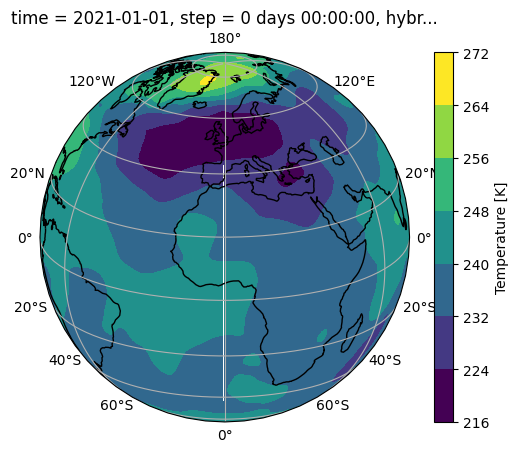

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.Orthographic(0, 20))
ax.coastlines()
ax.gridlines(draw_labels=True)
da[0].plot.contourf(ax=ax, transform=ccrs.PlateCarree())